# Chess positions and knight's tours via graphs

<span style="font-size: 16pt; font-style: italic; font-weight: bold">...in Raku</span>

Anton Antonov   
[RakuForPrediction at WordPress](https://rakuforprediction.wordpress.com)   
[RakuForPrediction-book at GitHub](https://github.com/antononcube/RakuForPrediction-book)      
November-December 2024

-----

## Introduction

In this notebook (presentation) we discuss:

- Two ways of plotting chessboards
- [Knight's tour](https://en.wikipedia.org/wiki/Knight%27s_tour) graphs
- [Hamiltonian paths](https://en.wikipedia.org/wiki/Hamiltonian_path)
- Animations of knight's tours

Showcased:
- All computational graph features discussed here are provided by ["Graph"](https://raku.land/zef:antononcube/Graph).  
- The chessboard plots with:
    - `dot-chessboard`, provided by ["Graphviz::DOT::Chessboard"](https://raku.land/zef:antononcube/Graphviz::DOT::Chessboard)
    - `js-d3-chessboard`, provided by ["JavaScript::D3"](https://raku.land/zef:antononcube/JavaScript::D3).
- Graph plotting with:
    - `js-d3-graph-plot`, provided by ["JavaScript::D3"](https://raku.land/zef:antononcube/JavaScript::D3).
    -  `Graph.dot`, that makes SVG images via [Graphviz](https://graphviz.org).

------

## Setup

Here are loaded the packages used in the rest of notebook:

In [14]:
use Graph;

use Graph::Circulant;
use Graph::Complete;
use Graph::CompleteKaryTree;
use Graph::Cycle;
use Graph::Grid;
use Graph::HexagonalGrid;
use Graph::Hypercube;
use Graph::KnightTour;
use Graph::Nested;
use Graph::Path;
use Graph::Petersen;
use Graph::Star;
use Graph::TriangularGrid;
use Graph::Wheel;

use Graph::Distribution;
use Graph::Random;

use Data::Reshapers;
use Data::Summarizers;
use Data::Generators;
use Data::TypeSystem;
use Data::Translators;
use Data::Geographics;

use Math::DistanceFunctions;
use Math::Nearest;
use Text::Levenshtein::Damerau;

use Hash::Merge;
use FunctionalParsers;
use FunctionalParsers::EBNF;
use EBNF::Grammar;
use Graphviz::DOT::Grammar;
use Graphviz::DOT::Chessboard;

use JavaScript::D3;
use WWW::MermaidInk;

use paths;

### JavaScript

Here we prepare the notebook to visualize with JavaScript:

In [15]:
#% javascript
require.config({
     paths: {
     d3: 'https://d3js.org/d3.v7.min'
}});

require(['d3'], function(d3) {
     console.log(d3);
});

Verification:

In [16]:
#% js
js-d3-list-line-plot(10.rand xx 40, background => 'none', stroke-width => 2)

Here we set a collection of visualization variables:

In [17]:
my $title-color = 'Ivory';
my $tick-labels-color = 'Ivory';
my $stroke-color = 'SlateGray';
my $tooltip-color = 'LightBlue';
my $tooltip-background-color = 'none';
my $background = '#1F1F1F';
my $color-scheme = 'schemeTableau10';
my $edge-thickness = 3;
my $vertex-size = 6;
my $engine = 'neato';
my $mmd-theme = q:to/END/;
%%{
  init: {
    'theme': 'forest',
    'themeVariables': {
      'lineColor': 'Ivory'
    }
  }
}%%
END
my %force = collision => {iterations => 0, radius => 10},link => {distance => 180};
my %force2 = charge => {strength => -30, iterations => 4}, collision => {radius => 50, iterations => 4}, link => {distance => 30};

my %opts = :$background, :$title-color, :$edge-thickness, :$vertex-size;

{background => #1F1F1F, edge-thickness => 3, title-color => Ivory, vertex-size => 6}

### LLM configurations

In [18]:
my $conf4o = llm-configuration('chatgpt', model=>'gpt-4o', max-tokens=>4096, temperature=>0.45);
my $conf-gemini = llm-configuration('gemini', model=>'gemini-1.5-pro-latest', max-tokens=>4096, temperature=>0.45);

($conf4o, $conf-gemini).map(*.Hash.elems)

(24 24)

------

## Chessboards

### SVG plots via **Graphviz DOT**

Using the package ["Graphviz::DOT::Chessboard"](), [AAp2].

In [19]:
#%html
my %opts = black-square-color => 'SandyBrown', white-square-color => 'Moccasin', :4r, :6c, size => (6,6);
my $dot = dot-chessboard(|%opts);
dot-chessboard(|%opts):svg

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 11.0.0 (20240428.1522)
 -->
<!-- Pages: 1 -->
 
 
 
<!-- cb-square-2_0 -->
 
 cb-square-2_0 
 
 
<!-- cb-square-3_0 -->
 
 cb-square-3_0 
 
 
<!-- cb-square-2_0--cb-square-3_0 -->
<!-- cb-square-2_1 -->
 
 cb-square-2_1 
 
 
<!-- cb-square-2_0--cb-square-2_1 -->
<!-- cb-square-3_2 -->
 
 cb-square-3_2 
 
 
<!-- cb-square-3_3 -->
 
 cb-square-3_3 
 
 
<!-- cb-square-3_2--cb-square-3_3 -->
<!-- cb-square-1_3 -->
 
 cb-square-1_3 
 
 
<!-- cb-square-1_4 -->
 
 cb-square-1_4 
 
 
<!-- cb-square-1_3--cb-square-1_4 -->
<!-- cb-square-2_3 -->
 
 cb-square-2_3 
 
 
<!-- cb-square-1_3--cb-square-2_3 -->
<!-- cb-square-1_1 -->
 
 cb-square-1_1 
 
 
<!-- cb-square-1_2 -->
 
 cb-square-1_2 
 
 
<!-- cb-square-1_1--cb-square-1_2 -->
<!-- cb-square-1_1--cb-square-2_1 -->
<!-- cb-square-2_4 -->
 
 cb-square-2_4 
 
 
<!-- cb-square-3_4 -->
 
 cb-square-3_4 
 
 
<!-- cb-square-2_4--cb-square-3_4 -->
<!-- cb-square-2_5 -->
 
 cb-square-2_5 
 
 
<!-- cb-square-2_4--cb-square-2_5 -->
<!-- cb-square-3_5 -->
 
 cb-square-3_5 
 
 
<!-- cb-square-3_4--cb-square-3_5 -->
<!-- cb-square-0_1 -->
 
 cb-square-0_1 
 
 
<!-- cb-square-0_1--cb-square-1_1 -->
<!-- cb-square-0_2 -->
 
 cb-square-0_2 
 
 
<!-- cb-square-0_1--cb-square-0_2 -->
<!-- cb-square-0_5 -->
 
 cb-square-0_5 
 
 
<!-- cb-square-1_5 -->
 
 cb-square-1_5 
 
 
<!-- cb-square-0_5--cb-square-1_5 -->
<!-- cb-square-0_3 -->
 
 cb-square-0_3 
 
 
<!-- cb-square-0_3--cb-square-1_3 -->
<!-- cb-square-0_4 -->
 
 cb-square-0_4 
 
 
<!-- cb-square-0_3--cb-square-0_4 -->
<!-- cb-square-1_2--cb-square-1_3 -->
<!-- cb-square-2_2 -->
 
 cb-square-2_2 
 
 
<!-- cb-square-1_2--cb-square-2_2 -->
<!-- cb-square-3_1 -->
 
 cb-square-3_1 
 
 
<!-- cb-square-3_0--cb-square-3_1 -->
<!-- cb-square-1_4--cb-square-2_4 -->
<!-- cb-square-1_4--cb-square-1_5 -->
<!-- cb-square-2_5--cb-square-3_5 -->
<!-- cb-square-2_3--cb-square-2_4 -->
<!-- cb-square-2_3--cb-square-3_3 -->
<!-- cb-square-0_0 -->
 
 cb-square-0_0 
 
 
<!-- cb-square-0_0--cb-square-0_1 -->
<!-- cb-square-1_0 -->
 
 cb-square-1_0 
 
 
<!-- cb-square-0_0--cb-square-1_0 -->
<!-- cb-square-3_3--cb-square-3_4 -->
<!-- cb-square-3_1--cb-square-3_2 -->
<!-- cb-square-1_5--cb-square-2_5 -->
<!-- cb-square-2_2--cb-square-3_2 -->
<!-- cb-square-2_2--cb-square-2_3 -->
<!-- cb-square-0_2--cb-square-0_3 -->
<!-- cb-square-0_2--cb-square-1_2 -->
<!-- cb-square-2_1--cb-square-3_1 -->
<!-- cb-square-2_1--cb-square-2_2 -->
<!-- cb-square-1_0--cb-square-2_0 -->
<!-- cb-square-1_0--cb-square-1_1 -->
<!-- cb-square-0_4--cb-square-0_5 -->
<!-- cb-square-0_4--cb-square-1_4 -->
<!-- cb-tick-2 -->
 
 cb-tick-2 
 
 2 
 
<!-- cb-tick-3 -->
 
 cb-tick-3 
 
 3 
 
<!-- cb-tick-2--cb-tick-3 -->
<!-- cb-tick-a -->
 
 cb-tick-a 
 
 a 
 
<!-- cb-tick-b -->
 
 cb-tick-b 
 
 b 
 
<!-- cb-tick-a--cb-tick-b -->
<!-- cb-tick-c -->
 
 cb-tick-c 
 
 c 
 
<!-- cb-tick-b--cb-tick-c -->
<!-- cb-tick-1 -->
 
 cb-tick-1 
 
 1 
 
<!-- cb-tick-1--cb-tick-2 -->
<!-- cb-tick-4 -->
 
 cb-tick-4 
 
 4 
 
<!-- cb-tick-f -->
 
 cb-tick-f 
 
 f 
 
<!-- cb-tick-e -->
 
 cb-tick-e 
 
 e 
 
<!-- cb-tick-e--cb-tick-f -->
<!-- cb-tick-3--cb-tick-4 -->
<!-- cb-tick-d -->
 
 cb-tick-d 
 
 d 
 
<!-- cb-tick-d--cb-tick-e -->
<!-- cb-tick-c--cb-tick-d -->

In [20]:
#% html
dot-chessboard(<a1N b3q>».comb, :4r, :6c, |%opts):svg;

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 11.0.0 (20240428.1522)
 -->
<!-- Pages: 1 -->
 
 
 
<!-- cb-square-2_5 -->
 
 cb-square-2_5 
 
 
<!-- cb-square-3_5 -->
 
 cb-square-3_5 
 
 
<!-- cb-square-2_5--cb-square-3_5 -->
<!-- cb-square-1_1 -->
 
 cb-square-1_1 
 
 
<!-- cb-square-1_2 -->
 
 cb-square-1_2 
 
 
<!-- cb-square-1_1--cb-square-1_2 -->
<!-- cb-square-2_1 -->
 
 cb-square-2_1 
 
 
<!-- cb-square-1_1--cb-square-2_1 -->
<!-- cb-square-0_2 -->
 
 cb-square-0_2 
 
 
<!-- cb-square-0_2--cb-square-1_2 -->
<!-- cb-square-0_3 -->
 
 cb-square-0_3 
 
 
<!-- cb-square-0_2--cb-square-0_3 -->
<!-- cb-square-0_1 -->
 
 cb-square-0_1 
 
 
<!-- cb-square-0_1--cb-square-1_1 -->
<!-- cb-square-0_1--cb-square-0_2 -->
<!-- cb-square-0_4 -->
 
 cb-square-0_4 
 
 
<!-- cb-square-1_4 -->
 
 cb-square-1_4 
 
 
<!-- cb-square-0_4--cb-square-1_4 -->
<!-- cb-square-0_5 -->
 
 cb-square-0_5 
 
 
<!-- cb-square-0_4--cb-square-0_5 -->
<!-- cb-square-2_2 -->
 
 cb-square-2_2 
 
 
<!-- cb-square-3_2 -->
 
 cb-square-3_2 
 
 
<!-- cb-square-2_2--cb-square-3_2 -->
<!-- cb-square-2_3 -->
 
 cb-square-2_3 
 
 
<!-- cb-square-2_2--cb-square-2_3 -->
<!-- cb-square-1_5 -->
 
 cb-square-1_5 
 
 
<!-- cb-square-1_4--cb-square-1_5 -->
<!-- cb-square-2_4 -->
 
 cb-square-2_4 
 
 
<!-- cb-square-1_4--cb-square-2_4 -->
<!-- cb-square-3_3 -->
 
 cb-square-3_3 
 
 
<!-- cb-square-3_2--cb-square-3_3 -->
<!-- cb-square-1_3 -->
 
 cb-square-1_3 
 
 
<!-- cb-square-1_3--cb-square-1_4 -->
<!-- cb-square-1_3--cb-square-2_3 -->
<!-- cb-square-1_2--cb-square-2_2 -->
<!-- cb-square-1_2--cb-square-1_3 -->
<!-- cb-square-1_5--cb-square-2_5 -->
<!-- cb-square-3_0 -->
 
 cb-square-3_0 
 
 
<!-- cb-square-3_1 -->
 
 cb-square-3_1 
 
 
<!-- cb-square-3_0--cb-square-3_1 -->
<!-- cb-square-2_3--cb-square-2_4 -->
<!-- cb-square-2_3--cb-square-3_3 -->
<!-- cb-square-2_4--cb-square-2_5 -->
<!-- cb-square-3_4 -->
 
 cb-square-3_4 
 
 
<!-- cb-square-2_4--cb-square-3_4 -->
<!-- cb-square-0_0 -->
 
 cb-square-0_0 
 
 
<!-- cb-square-0_0--cb-square-0_1 -->
<!-- cb-square-1_0 -->
 
 cb-square-1_0 
 
 
<!-- cb-square-0_0--cb-square-1_0 -->
<!-- cb-square-1_0--cb-square-1_1 -->
<!-- cb-square-2_0 -->
 
 cb-square-2_0 
 
 
<!-- cb-square-1_0--cb-square-2_0 -->
<!-- cb-square-3_1--cb-square-3_2 -->
<!-- cb-square-0_3--cb-square-0_4 -->
<!-- cb-square-0_3--cb-square-1_3 -->
<!-- cb-square-3_4--cb-square-3_5 -->
<!-- cb-square-2_1--cb-square-2_2 -->
<!-- cb-square-2_1--cb-square-3_1 -->
<!-- cb-square-0_5--cb-square-1_5 -->
<!-- cb-square-3_3--cb-square-3_4 -->
<!-- cb-square-2_0--cb-square-3_0 -->
<!-- cb-square-2_0--cb-square-2_1 -->
<!-- cb-tick-a -->
 
 cb-tick-a 
 
 a 
 
<!-- cb-tick-b -->
 
 cb-tick-b 
 
 b 
 
<!-- cb-tick-a--cb-tick-b -->
<!-- cb-tick-c -->
 
 cb-tick-c 
 
 c 
 
<!-- cb-tick-b--cb-tick-c -->
<!-- cb-tick-f -->
 
 cb-tick-f 
 
 f 
 
<!-- cb-tick-4 -->
 
 cb-tick-4 
 
 4 
 
<!-- cb-tick-d -->
 
 cb-tick-d 
 
 d 
 
<!-- cb-tick-c--cb-tick-d -->
<!-- cb-tick-2 -->
 
 cb-tick-2 
 
 2 
 
<!-- cb-tick-3 -->
 
 cb-tick-3 
 
 3 
 
<!-- cb-tick-2--cb-tick-3 -->
<!-- cb-tick-1 -->
 
 cb-tick-1 
 
 1 
 
<!-- cb-tick-1--cb-tick-2 -->
<!-- cb-tick-3--cb-tick-4 -->
<!-- cb-tick-e -->
 
 cb-tick-e 
 
 e 
 
<!-- cb-tick-e--cb-tick-f -->
<!-- cb-tick-d--cb-tick-e -->
<!-- p0 -->
 
 p0 
 
 ♞ 
 
<!-- p1 -->
 
 p1 
 
 ♘ 
 
<!-- p2 -->
 
 p2 
 
 ♛

### JavaScript plots

Here is another way to make a chessboard using ["JavaScript::D3"](https://raku.land/zef:antononcube/JavaScript::D3), [AAp3]:

In [21]:
#% js
js-d3-chessboard('8/8/8/8/8/8/8/8', :$background, :$tick-labels-color, :$title-color, width => 500, color-palette => 'Greys')

Here we specify position of the pieces:

In [22]:
#% js
js-d3-chessboard(<a1N b3q>».comb».List, :$background, :$tick-labels-color, width => 500);

**Remark:** The JavaScript (D3.js) plots are not used here because it is hard to do combined board-tour plots like the one shown below.

### FEN strings

Both packages -- "Graphviz::DOT::Chessboard" and "JavaScript::D3" -- can process Forsyth-Edwards Notation (FEN) strings of chess positions:

In [23]:
#%html
my $fen = '8/8/8/3K4/5r2/8/1k6/8';

dot-chessboard($fen, :5r, :6c, :4size):svg

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 11.0.0 (20240428.1522)
 -->
<!-- Pages: 1 -->
 
 
 
<!-- cb-square-2_2 -->
 
 cb-square-2_2 
 
 
<!-- cb-square-3_2 -->
 
 cb-square-3_2 
 
 
<!-- cb-square-2_2--cb-square-3_2 -->
<!-- cb-square-2_3 -->
 
 cb-square-2_3 
 
 
<!-- cb-square-2_2--cb-square-2_3 -->
<!-- cb-square-4_2 -->
 
 cb-square-4_2 
 
 
<!-- cb-square-4_3 -->
 
 cb-square-4_3 
 
 
<!-- cb-square-4_2--cb-square-4_3 -->
<!-- cb-square-0_1 -->
 
 cb-square-0_1 
 
 
<!-- cb-square-1_1 -->
 
 cb-square-1_1 
 
 
<!-- cb-square-0_1--cb-square-1_1 -->
<!-- cb-square-0_2 -->
 
 cb-square-0_2 
 
 
<!-- cb-square-0_1--cb-square-0_2 -->
<!-- cb-square-2_4 -->
 
 cb-square-2_4 
 
 
<!-- cb-square-3_4 -->
 
 cb-square-3_4 
 
 
<!-- cb-square-2_4--cb-square-3_4 -->
<!-- cb-square-2_5 -->
 
 cb-square-2_5 
 
 
<!-- cb-square-2_4--cb-square-2_5 -->
<!-- cb-square-0_4 -->
 
 cb-square-0_4 
 
 
<!-- cb-square-0_5 -->
 
 cb-square-0_5 
 
 
<!-- cb-square-0_4--cb-square-0_5 -->
<!-- cb-square-1_4 -->
 
 cb-square-1_4 
 
 
<!-- cb-square-0_4--cb-square-1_4 -->
<!-- cb-square-4_4 -->
 
 cb-square-4_4 
 
 
<!-- cb-square-3_4--cb-square-4_4 -->
<!-- cb-square-3_5 -->
 
 cb-square-3_5 
 
 
<!-- cb-square-3_4--cb-square-3_5 -->
<!-- cb-square-1_5 -->
 
 cb-square-1_5 
 
 
<!-- cb-square-0_5--cb-square-1_5 -->
<!-- cb-square-3_2--cb-square-4_2 -->
<!-- cb-square-3_3 -->
 
 cb-square-3_3 
 
 
<!-- cb-square-3_2--cb-square-3_3 -->
<!-- cb-square-1_3 -->
 
 cb-square-1_3 
 
 
<!-- cb-square-1_3--cb-square-1_4 -->
<!-- cb-square-1_3--cb-square-2_3 -->
<!-- cb-square-4_5 -->
 
 cb-square-4_5 
 
 
<!-- cb-square-4_4--cb-square-4_5 -->
<!-- cb-square-0_0 -->
 
 cb-square-0_0 
 
 
<!-- cb-square-0_0--cb-square-0_1 -->
<!-- cb-square-1_0 -->
 
 cb-square-1_0 
 
 
<!-- cb-square-0_0--cb-square-1_0 -->
<!-- cb-square-2_1 -->
 
 cb-square-2_1 
 
 
<!-- cb-square-2_1--cb-square-2_2 -->
<!-- cb-square-3_1 -->
 
 cb-square-3_1 
 
 
<!-- cb-square-2_1--cb-square-3_1 -->
<!-- cb-square-3_0 -->
 
 cb-square-3_0 
 
 
<!-- cb-square-3_0--cb-square-3_1 -->
<!-- cb-square-4_0 -->
 
 cb-square-4_0 
 
 
<!-- cb-square-3_0--cb-square-4_0 -->
<!-- cb-square-4_3--cb-square-4_4 -->
<!-- cb-square-1_4--cb-square-2_4 -->
<!-- cb-square-1_4--cb-square-1_5 -->
<!-- cb-square-1_1--cb-square-2_1 -->
<!-- cb-square-1_2 -->
 
 cb-square-1_2 
 
 
<!-- cb-square-1_1--cb-square-1_2 -->
<!-- cb-square-3_3--cb-square-3_4 -->
<!-- cb-square-3_3--cb-square-4_3 -->
<!-- cb-square-3_1--cb-square-3_2 -->
<!-- cb-square-4_1 -->
 
 cb-square-4_1 
 
 
<!-- cb-square-3_1--cb-square-4_1 -->
<!-- cb-square-1_0--cb-square-1_1 -->
<!-- cb-square-2_0 -->
 
 cb-square-2_0 
 
 
<!-- cb-square-1_0--cb-square-2_0 -->
<!-- cb-square-3_5--cb-square-4_5 -->
<!-- cb-square-2_3--cb-square-2_4 -->
<!-- cb-square-2_3--cb-square-3_3 -->
<!-- cb-square-2_0--cb-square-2_1 -->
<!-- cb-square-2_0--cb-square-3_0 -->
<!-- cb-square-1_5--cb-square-2_5 -->
<!-- cb-square-0_3 -->
 
 cb-square-0_3 
 
 
<!-- cb-square-0_3--cb-square-0_4 -->
<!-- cb-square-0_3--cb-square-1_3 -->
<!-- cb-square-2_5--cb-square-3_5 -->
<!-- cb-square-4_1--cb-square-4_2 -->
<!-- cb-square-4_0--cb-square-4_1 -->
<!-- cb-square-0_2--cb-square-0_3 -->
<!-- cb-square-0_2--cb-square-1_2 -->
<!-- cb-square-1_2--cb-square-2_2 -->
<!-- cb-square-1_2--cb-square-1_3 -->
<!-- cb-tick-4 -->
 
 cb-tick-4 
 
 4 
 
<!-- cb-tick-5 -->
 
 cb-tick-5 
 
 5 
 
<!-- cb-tick-4--cb-tick-5 -->
<!-- cb-tick-e -->
 
 cb-tick-e 
 
 e 
 
<!-- cb-tick-f -->
 
 cb-tick-f 
 
 f 
 
<!-- cb-tick-e--cb-tick-f -->
<!-- cb-tick-1 -->
 
 cb-tick-1 
 
 1 
 
<!-- cb-tick-2 -->
 
 cb-tick-2 
 
 2 
 
<!-- cb-tick-1--cb-tick-2 -->
<!-- cb-tick-a -->
 
 cb-tick-a 
 
 a 
 
<!-- cb-tick-b -->
 
 cb-tick-b 
 
 b 
 
<!-- cb-tick-a--cb-tick-b -->
<!-- cb-tick-d -->
 
 cb-tick-d 
 
 d 
 
<!-- cb-tick-d--cb-tick-e -->
<!-- cb-tick-3 -->
 
 cb-ti

In [24]:
#% js
js-d3-chessboard($fen, :$background, :$tick-labels-color,  width => 500)

-----

## Chessboard plotting steps

This section gives step-by-step explanations how to make chessboard plots using grid graphs and Graphviz.

Make a chessboard SVG plot using a grid graph:

In [25]:
#%html
my $gg = Graph::Grid.new(4, 6);

# Leveraging that grid graphs are bipartite
my %highlight = <DimGray LightGray> Z=> $gg.bipartite-coloring.classify(*.value).nodemap(*».key).values;


# DOT language spec
my $preamble = q:to/END/;
fontcolor = "Ivory";
fontsize = "16";
labelloc = "t";
label = "Chessboard by DOT";
graph [size="6,12!"];

bgcolor="#1F1F1F";
node [style=filled, label="", opacity=0.3, fixedsize=true, shape=square, color="Black", fillcolor="SlateBlue", penwidth=1, fontsize=4, fontcolor="White", labelloc=c, width=0.98, height=0.3];
edge [style=invis, color="SteelBlue", penwidth=0.6];
END

# To be reused for overlaying tour paths
my $dot = $gg.dot(:$preamble, :%highlight, :!node-labels).lines[1..*-2].join("\n");

# Rendering of the DOT spec
$gg.dot(:$preamble, :%highlight, :!node-labels, engine=>'neato'):svg;

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 11.0.0 (20240428.1522)
 -->
<!-- Pages: 1 -->
 
 
 
 Chessboard by DOT 
<!-- 1_2 -->
 
 1_2 
 
 
<!-- 1_3 -->
 
 1_3 
 
 
<!-- 1_2--1_3 -->
<!-- 2_2 -->
 
 2_2 
 
 
<!-- 1_2--2_2 -->
<!-- 1_4 -->
 
 1_4 
 
 
<!-- 1_3--1_4 -->
<!-- 2_3 -->
 
 2_3 
 
 
<!-- 1_3--2_3 -->
<!-- 0_0 -->
 
 0_0 
 
 
<!-- 1_0 -->
 
 1_0 
 
 
<!-- 0_0--1_0 -->
<!-- 0_1 -->
 
 0_1 
 
 
<!-- 0_0--0_1 -->
<!-- 1_5 -->
 
 1_5 
 
 
<!-- 2_5 -->
 
 2_5 
 
 
<!-- 1_5--2_5 -->
<!-- 2_1 -->
 
 2_1 
 
 
<!-- 2_1--2_2 -->
<!-- 3_1 -->
 
 3_1 
 
 
<!-- 2_1--3_1 -->
<!-- 0_5 -->
 
 0_5 
 
 
<!-- 0_5--1_5 -->
<!-- 3_5 -->
 
 3_5 
 
 
<!-- 2_5--3_5 -->
<!-- 0_4 -->
 
 0_4 
 
 
<!-- 0_4--0_5 -->
<!-- 0_4--1_4 -->
<!-- 3_3 -->
 
 3_3 
 
 
<!-- 3_4 -->
 
 3_4 
 
 
<!-- 3_3--3_4 -->
<!-- 0_3 -->
 
 0_3 
 
 
<!-- 0_3--1_3 -->
<!-- 0_3--0_4 -->
<!-- 1_4--1_5 -->
<!-- 2_4 -->
 
 2_4 
 
 
<!-- 1_4--2_4 -->
<!-- 2_0 -->
 
 2_0 
 
 
<!-- 2_0--2_1 -->
<!-- 3_0 -->
 
 3_0 
 
 
<!-- 2_0--3_0 -->
<!-- 2_4--2_5 -->
<!-- 2_4--3_4 -->
<!-- 1_0--2_0 -->
<!-- 1_1 -->
 
 1_1 
 
 
<!-- 1_0--1_1 -->
<!-- 2_3--3_3 -->
<!-- 2_3--2_4 -->
<!-- 2_2--2_3 -->
<!-- 3_2 -->
 
 3_2 
 
 
<!-- 2_2--3_2 -->
<!-- 3_2--3_3 -->
<!-- 3_1--3_2 -->
<!-- 3_0--3_1 -->
<!-- 0_2 -->
 
 0_2 
 
 
<!-- 0_2--1_2 -->
<!-- 0_2--0_3 -->
<!-- 1_1--1_2 -->
<!-- 1_1--2_1 -->
<!-- 3_4--3_5 -->
<!-- 0_1--0_2 -->
<!-- 0_1--1_1 -->

Showcased:
- All computational graph features discussed here are provided by ["Graph"](https://raku.land/zef:antononcube/Graph).   
- Graph plotting with:
    - `js-d3-graph-plot`, provided by ["JavaScript::D3"](https://raku.land/zef:antononcube/JavaScript::D3).
    -  `Graph.dot`, that makes SVG images via [Graphviz](https://graphviz.org).

--------

## Knight's tour over a chessboard

Make a Knight's tour graph:

In [26]:
my $gkt = Graph::KnightTour.new(4, 6, prefix => 'kt');

Graph(vertexes => 24, edges => 44, directed => False)

Show the corresponding Graphviz DOT plot:

In [27]:
#% html
$gkt.dot(engine => 'neato', :$background, vertex-shape => 'ellipse', vertex-width => 0.6):svg

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 11.0.0 (20240428.1522)
 -->
<!-- Pages: 1 -->
 
 
 
<!-- kt3_2 -->
 
 kt3_2 
 
 kt3_2 
 
<!-- kt4_0 -->
 
 kt4_0 
 
 kt4_0 
 
<!-- kt3_2--kt4_0 -->
 
 kt3_2--kt4_0 
 
 
<!-- kt5_3 -->
 
 kt5_3 
 
 kt5_3 
 
<!-- kt3_2--kt5_3 -->
 
 kt3_2--kt5_3 
 
 
<!-- kt5_1 -->
 
 kt5_1 
 
 kt5_1 
 
<!-- kt3_2--kt5_1 -->
 
 kt3_2--kt5_1 
 
 
<!-- kt5_2 -->
 
 kt5_2 
 
 kt5_2 
 
<!-- kt4_0--kt5_2 -->
 
 kt4_0--kt5_2 
 
 
<!-- kt4_2 -->
 
 kt4_2 
 
 kt4_2 
 
<!-- kt5_0 -->
 
 kt5_0 
 
 kt5_0 
 
<!-- kt4_2--kt5_0 -->
 
 kt4_2--kt5_0 
 
 
<!-- kt1_3 -->
 
 kt1_3 
 
 kt1_3 
 
<!-- kt1_3--kt3_2 -->
 
 kt1_3--kt3_2 
 
 
<!-- kt2_1 -->
 
 kt2_1 
 
 kt2_1 
 
<!-- kt1_3--kt2_1 -->
 
 kt1_3--kt2_1 
 
 
<!-- kt2_0 -->
 
 kt2_0 
 
 kt2_0 
 
<!-- kt2_0--kt3_2 -->
 
 kt2_0--kt3_2 
 
 
<!-- kt4_1 -->
 
 kt4_1 
 
 kt4_1 
 
<!-- kt2_0--kt4_1 -->
 
 kt2_0--kt4_1 
 
 
<!-- kt0_0 -->
 
 kt0_0 
 
 kt0_0 
 
<!-- kt1_2 -->
 
 kt1_2 
 
 kt1_2 
 
<!-- kt0_0--kt1_2 -->
 
 kt0_0--kt1_2 
 
 
<!-- kt0_0--kt2_1 -->
 
 kt0_0--kt2_1 
 
 
<!-- kt1_0 -->
 
 kt1_0 
 
 kt1_0 
 
<!-- kt3_1 -->
 
 kt3_1 
 
 kt3_1 
 
<!-- kt1_0--kt3_1 -->
 
 kt1_0--kt3_1 
 
 
<!-- kt2_2 -->
 
 kt2_2 
 
 kt2_2 
 
<!-- kt1_0--kt2_2 -->
 
 kt1_0--kt2_2 
 
 
<!-- kt3_3 -->
 
 kt3_3 
 
 kt3_3 
 
<!-- kt3_3--kt4_1 -->
 
 kt3_3--kt4_1 
 
 
<!-- kt3_3--kt5_2 -->
 
 kt3_3--kt5_2 
 
 
<!-- kt2_3 -->
 
 kt2_3 
 
 kt2_3 
 
<!-- kt2_3--kt4_2 -->
 
 kt2_3--kt4_2 
 
 
<!-- kt2_3--kt3_1 -->
 
 kt2_3--kt3_1 
 
 
<!-- kt0_3 -->
 
 kt0_3 
 
 kt0_3 
 
<!-- kt1_1 -->
 
 kt1_1 
 
 kt1_1 
 
<!-- kt0_3--kt1_1 -->
 
 kt0_3--kt1_1 
 
 
<!-- kt0_3--kt2_2 -->
 
 kt0_3--kt2_2 
 
 
<!-- kt4_1--kt5_3 -->
 
 kt4_1--kt5_3 
 
 
<!-- kt3_0 -->
 
 kt3_0 
 
 kt3_0 
 
<!-- kt3_0--kt4_2 -->
 
 kt3_0--kt4_2 
 
 
<!-- kt3_0--kt5_1 -->
 
 kt3_0--kt5_1 
 
 
<!-- kt1_2--kt2_0 -->
 
 kt1_2--kt2_0 
 
 
<!-- kt1_2--kt3_3 -->
 
 kt1_2--kt3_3 
 
 
<!-- kt1_2--kt3_1 -->
 
 kt1_2--kt3_1 
 
 
<!-- kt4_3 -->
 
 kt4_3 
 
 kt4_3 
 
<!-- kt3_1--kt4_3 -->
 
 kt3_1--kt4_3 
 
 
<!-- kt3_1--kt5_2 -->
 
 kt3_1--kt5_2 
 
 
<!-- kt3_1--kt5_0 -->
 
 kt3_1--kt5_0 
 
 
<!-- kt0_2 -->
 
 kt0_2 
 
 kt0_2 
 
<!-- kt0_2--kt1_0 -->
 
 kt0_2--kt1_0 
 
 
<!-- kt0_2--kt2_3 -->
 
 kt0_2--kt2_3 
 
 
<!-- kt0_2--kt2_1 -->
 
 kt0_2--kt2_1 
 
 
<!-- kt4_3--kt5_1 -->
 
 kt4_3--kt5_1 
 
 
<!-- kt2_1--kt4_0 -->
 
 kt2_1--kt4_0 
 
 
<!-- kt2_1--kt4_2 -->
 
 kt2_1--kt4_2 
 
 
<!-- kt2_1--kt3_3 -->
 
 kt2_1--kt3_3 
 
 
<!-- kt1_1--kt3_2 -->
 
 kt1_1--kt3_2 
 
 
<!-- kt1_1--kt2_3 -->
 
 kt1_1--kt2_3 
 
 
<!-- kt1_1--kt3_0 -->
 
 kt1_1--kt3_0 
 
 
<!-- kt2_2--kt4_1 -->
 
 kt2_2--kt4_1 
 
 
<!-- kt2_2--kt3_0 -->
 
 kt2_2--kt3_0 
 
 
<!-- kt2_2--kt4_3 -->
 
 kt2_2--kt4_3 
 
 
<!-- kt0_1 -->
 
 kt0_1 
 
 kt0_1 
 
<!-- kt0_1--kt1_3 -->
 
 kt0_1--kt1_3 
 
 
<!-- kt0_1--kt2_0 -->
 
 kt0_1--kt2_0 
 
 
<!-- kt0_1--kt2_2 -->
 
 kt0_1--kt2_2

-----

## Hamiltonian path finding

- Finding a Hamiltonian path is NP-complete problem. 
- Hence, using algorithms that is fast, but do not always "work" can be desirable.

Two algorithms to consider:

- The backtracking algorithm with [Warnsdorf's rule](https://en.wikipedia.org/wiki/Knight%27s_tour#Warnsdorf's_rule)
- Random (Angluin-Valiant) algorithm

Using (deterministic) backtracking algorithm to find a Hamiltonian path:

In [28]:
my $end = Whatever; #'kt0_3';# Whatever;
my @hpath = $gkt.find-hamiltonian-path('kt0_0', $end, method => 'backtracking', :warnsdorf-rule);

[kt0_0 kt1_2 kt2_0 kt0_1 kt1_3 kt3_2 kt5_3 kt4_1 kt3_3 kt5_2 kt4_0 kt2_1 kt0_2 kt1_0 kt2_2 kt0_3 kt1_1 kt3_0 kt5_1 kt4_3 kt3_1 kt5_0 kt4_2 kt2_3]

Using (random) Angluin-Valiant algorithm:

In [29]:
my @hpath = $gkt.find-hamiltonian-path('kt0_0', $end, method => 'random', pick => 'max-degree');

[kt0_0 kt2_1 kt1_3 kt0_1 kt2_0 kt1_2 kt3_3 kt4_1 kt5_3 kt3_2 kt4_0 kt5_2 kt3_1 kt5_0 kt4_2 kt2_3 kt0_2 kt1_0 kt2_2 kt0_3 kt1_1 kt3_0 kt5_1 kt4_3]

Show the found Hamiltonian Knight path on a chessboard:

In [30]:
#% html

# Reusing the "chessboard graph" DOT spec above.
my $preamble = [
    $dot.subst('--', '->', :g).subst('label="",').subst('Chessboard by DOT', "Knight's Hamiltonian path"),
    'node [shape=ellipse, fillcolor=Yellow, width=0.2, height=0.2, fixedsize=true, style=filled, color=Orange, fontsize=10, fontcolor=Black];',
    'edge [style=filled, width=103, color=Orange];',
].join("\n");

# Make a path graph from the found Hamiltonian path.
my $gp = Graph::Path.new(@hpath):directed;

# Set the graph vertex coordinates.
$gp.vertex-coordinates = $gkt.vertex-coordinates;

# Replace (rename) the path graph vertices to ordinals. 
# (In order to show the sequential order of the path.)
$gp .= vertex-replace((@hpath Z=> (^@hpath.elems)».Str).Hash); 

my $kdot = $gp.dot(:$preamble, engine=>'neato'):svg;

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 11.0.0 (20240428.1522)
 -->
<!-- Pages: 1 -->
 
 
 
 Knight's Hamiltonian path 
<!-- 1_2 -->
 
 1_2 
 
 
<!-- 1_3 -->
 
 1_3 
 
 
<!-- 1_2->1_3 -->
<!-- 2_2 -->
 
 2_2 
 
 
<!-- 1_2->2_2 -->
<!-- 1_4 -->
 
 1_4 
 
 
<!-- 1_3->1_4 -->
<!-- 2_3 -->
 
 2_3 
 
 
<!-- 1_3->2_3 -->
<!-- 0_0 -->
 
 0_0 
 
 
<!-- 1_0 -->
 
 1_0 
 
 
<!-- 0_0->1_0 -->
<!-- 0_1 -->
 
 0_1 
 
 
<!-- 0_0->0_1 -->
<!-- 1_5 -->
 
 1_5 
 
 
<!-- 2_5 -->
 
 2_5 
 
 
<!-- 1_5->2_5 -->
<!-- 2_1 -->
 
 2_1 
 
 
<!-- 2_1->2_2 -->
<!-- 3_1 -->
 
 3_1 
 
 
<!-- 2_1->3_1 -->
<!-- 0_5 -->
 
 0_5 
 
 
<!-- 0_5->1_5 -->
<!-- 3_5 -->
 
 3_5 
 
 
<!-- 2_5->3_5 -->
<!-- 0_4 -->
 
 0_4 
 
 
<!-- 0_4->0_5 -->
<!-- 0_4->1_4 -->
<!-- 3_3 -->
 
 3_3 
 
 
<!-- 3_4 -->
 
 3_4 
 
 
<!-- 3_3->3_4 -->
<!-- 0_3 -->
 
 0_3 
 
 
<!-- 0_3->1_3 -->
<!-- 0_3->0_4 -->
<!-- 1_4->1_5 -->
<!-- 2_4 -->
 
 2_4 
 
 
<!-- 1_4->2_4 -->
<!-- 2_0 -->
 
 2_0 
 
 
<!-- 2_0->2_1 -->
<!-- 3_0 -->
 
 3_0 
 
 
<!-- 2_0->3_0 -->
<!-- 2_4->2_5 -->
<!-- 2_4->3_4 -->
<!-- 1_0->2_0 -->
<!-- 1_1 -->
 
 1_1 
 
 
<!-- 1_0->1_1 -->
<!-- 2_3->3_3 -->
<!-- 2_3->2_4 -->
<!-- 2_2->2_3 -->
<!-- 3_2 -->
 
 3_2 
 
 
<!-- 2_2->3_2 -->
<!-- 3_2->3_3 -->
<!-- 3_1->3_2 -->
<!-- 3_0->3_1 -->
<!-- 0_2 -->
 
 0_2 
 
 
<!-- 0_2->1_2 -->
<!-- 0_2->0_3 -->
<!-- 1_1->1_2 -->
<!-- 1_1->2_1 -->
<!-- 3_4->3_5 -->
<!-- 0_1->0_2 -->
<!-- 0_1->1_1 -->
<!-- 13 -->
 
 13 
 
 13 
 
<!-- 14 -->
 
 14 
 
 14 
 
<!-- 13->14 -->
 
 13->14 
 
 
 
<!-- 15 -->
 
 15 
 
 15 
 
<!-- 14->15 -->
 
 14->15 
 
 
 
<!-- 21 -->
 
 21 
 
 21 
 
<!-- 22 -->
 
 22 
 
 22 
 
<!-- 21->22 -->
 
 21->22 
 
 
 
<!-- 7 -->
 
 7 
 
 7 
 
<!-- 8 -->
 
 8 
 
 8 
 
<!-- 7->8 -->
 
 7->8 
 
 
 
<!-- 16 -->
 
 16 
 
 16 
 
<!-- 17 -->
 
 17 
 
 17 
 
<!-- 16->17 -->
 
 16->17 
 
 
 
<!-- 3 -->
 
 3 
 
 3 
 
<!-- 4 -->
 
 4 
 
 4 
 
<!-- 3->4 -->
 
 3->4 
 
 
 
<!-- 12 -->
 
 12 
 
 12 
 
<!-- 12->13 -->
 
 12->13 
 
 
 
<!-- 23 -->
 
 23 
 
 23 
 
<!-- 20 -->
 
 20 
 
 20 
 
<!-- 20->21 -->
 
 20->21 
 
 
 
<!-- 18 -->
 
 18 
 
 18 
 
<!-- 19 -->
 
 19 
 
 19 
 
<!-- 18->19 -->
 
 18->19 
 
 
 
<!-- 2 -->
 
 2 
 
 2 
 
<!-- 2->3 -->
 
 2->3 
 
 
 
<!-- 5 -->
 
 5 
 
 5 
 
<!-- 6 -->
 
 6 
 
 6 
 
<!-- 5->6 -->
 
 5->6 
 
 
 
<!-- 4->5 -->
 
 4->5 
 
 
 
<!-- 1 -->
 
 1 
 
 1 
 
<!-- 1->2 -->
 
 1->2 
 
 
 
<!-- 9 -->
 
 9 
 
 9 
 
<!-- 8->9 -->
 
 8->9 
 
 
 
<!-- 19->20 -->
 
 19->20 
 
 
 
<!-- 0 -->
 
 0 
 
 0 
 
<!-- 0->1 -->
 
 0->1 
 
 
 
<!-- 15->16 -->
 
 15->16 
 
 
 
<!-- 10 -->
 
 10 
 
 10 
 
<!-- 11 -->
 
 11 
 
 11 
 
<!-- 10->11 -->
 
 10->11 
 
 
 
<!-- 17->18 -->
 
 17->18 
 
 
 
<!-- 9->10 -->
 
 9->10 
 
 
 
<!-- 11->12 -->
 
 11->12 
 
 
 
<!-- 22->23 -->
 
 22->23 
 
 
 
<!-- 6->7 -->
 
 6->7

-----

## Animation

It would be nice to produces an animation of the knight's tour. 

***It is an instructive exercise to figure out how to make such an animation using SVG, LLMs (in Raku.)***

### Get path points

Extract the knight jump points from SVG plot:

In [31]:
my @points = do with $kdot.match(/ '<title>' (\d+) '</title>' \s* '<ellipse fill="Yellow" stroke="Orange" cx="' (.*?) '" cy="' (.*?) '"'/, :g) {
    $/.map({ $_.values».Str })
}

[(13 395.28 -35.28) (14 323.28 -179.28) (15 179.28 -251.28) (21 251.28 -35.28) (22 395.28 -107.28) (7 323.28 -107.28) (8 395.28 -251.28) (16 35.28 -179.28) (17 107.28 -35.28) (3 35.28 -107.28) (4 179.28 -35.28) (12 251.28 -107.28) (23 323.28 -251.28) (20 107.28 -107.28) (18 179.28 -179.28) (19 35.28 -251.28) (2 107.28 -251.28) (5 107.28 -179.28) (6 251.28 -251.28) (1 179.28 -107.28) (9 251.28 -179.28) (0 35.28 -35.28) (10 323.28 -35.28) (11 395.28 -179.28)]

Sort in the order of jumping:

In [32]:
@points = @points».Numeric.sort(*.head).map(*.tail(2))».Array.Array

[[35.28 -35.28] [179.28 -107.28] [107.28 -251.28] [35.28 -107.28] [179.28 -35.28] [107.28 -179.28] [251.28 -251.28] [323.28 -107.28] [395.28 -251.28] [251.28 -179.28] [323.28 -35.28] [395.28 -179.28] [251.28 -107.28] [395.28 -35.28] [323.28 -179.28] [179.28 -251.28] [35.28 -179.28] [107.28 -35.28] [179.28 -179.28] [35.28 -251.28] [107.28 -107.28] [251.28 -35.28] [395.28 -107.28] [323.28 -251.28]]

### LLM function

Make an LLM function that produces SVG animation specs for given lists of points:

In [33]:
my &fAnim = llm-function({
    [ 
        llm-prompt('CodeWriterX')('SVG'),
        "Make an animation of a red circle along these points (x, y):",
        '```raku',
        $_.raku,
        '```',
        'Use the SVG `<path>` element.',
        'Make it adhere to an element that has the following transformation:',
        '```svg',
        '<g id="anim" class="graph" transform="scale(1.31339 1.31339) rotate(0) translate(4 317.31)">',
        '```',
        'Make it stop at the last point.'
    ]},
    e => $conf4o
)

-> **@args, *%args { #`(Block|6333968258712) ... }

### Make the animation fragment

In [34]:
# my $res = &fAnim(@points).match(/'<g' .* '</g>'/).Str

()

Combine the SVGs into an animation:

In [35]:
#%html
# my $dot2 = $kdot.subst('</svg>', $res ~ "</svg>")

()

Instead of calling the LLM-function repeatedly let us make a dedicated one:

In [46]:
my $transform = ($kdot ~~ / 'transform="scale(' .*? ')'/).Str

transform="scale(0.985042 0.985042)

In [47]:
sub animation-fragment(@points) {
    my $path = @points.map({"L" ~ $_.join(',')}).join("\n");
    $path = $path.subst('L', 'M');

    my $svg-anim = Q:s:to/END/;
    <g id="anim" class="graph" $transform rotate(0) translate(4 317.31)">
        <path id="path" fill="none" stroke="none" d="
        $path
        " />
        <circle r="6" fill="blue">
        <animateMotion dur="10s" repeatCount="1" fill="freeze">
            <mpath href="#path" />
        </animateMotion>
        </circle>
    </g>
    END
}

&animation-fragment

In [48]:
#%html
my $dot2 = $kdot.subst('</svg>', animation-fragment(@points) ~ "</svg>")

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 11.0.0 (20240428.1522)
 -->
<!-- Pages: 1 -->
 
 
 
 Knight's Hamiltonian path 
<!-- 1_2 -->
 
 1_2 
 
 
<!-- 1_3 -->
 
 1_3 
 
 
<!-- 1_2->1_3 -->
<!-- 2_2 -->
 
 2_2 
 
 
<!-- 1_2->2_2 -->
<!-- 1_4 -->
 
 1_4 
 
 
<!-- 1_3->1_4 -->
<!-- 2_3 -->
 
 2_3 
 
 
<!-- 1_3->2_3 -->
<!-- 0_0 -->
 
 0_0 
 
 
<!-- 1_0 -->
 
 1_0 
 
 
<!-- 0_0->1_0 -->
<!-- 0_1 -->
 
 0_1 
 
 
<!-- 0_0->0_1 -->
<!-- 1_5 -->
 
 1_5 
 
 
<!-- 2_5 -->
 
 2_5 
 
 
<!-- 1_5->2_5 -->
<!-- 2_1 -->
 
 2_1 
 
 
<!-- 2_1->2_2 -->
<!-- 3_1 -->
 
 3_1 
 
 
<!-- 2_1->3_1 -->
<!-- 0_5 -->
 
 0_5 
 
 
<!-- 0_5->1_5 -->
<!-- 3_5 -->
 
 3_5 
 
 
<!-- 2_5->3_5 -->
<!-- 0_4 -->
 
 0_4 
 
 
<!-- 0_4->0_5 -->
<!-- 0_4->1_4 -->
<!-- 3_3 -->
 
 3_3 
 
 
<!-- 3_4 -->
 
 3_4 
 
 
<!-- 3_3->3_4 -->
<!-- 0_3 -->
 
 0_3 
 
 
<!-- 0_3->1_3 -->
<!-- 0_3->0_4 -->
<!-- 1_4->1_5 -->
<!-- 2_4 -->
 
 2_4 
 
 
<!-- 1_4->2_4 -->
<!-- 2_0 -->
 
 2_0 
 
 
<!-- 2_0->2_1 -->
<!-- 3_0 -->
 
 3_0 
 
 
<!-- 2_0->3_0 -->
<!-- 2_4->2_5 -->
<!-- 2_4->3_4 -->
<!-- 1_0->2_0 -->
<!-- 1_1 -->
 
 1_1 
 
 
<!-- 1_0->1_1 -->
<!-- 2_3->3_3 -->
<!-- 2_3->2_4 -->
<!-- 2_2->2_3 -->
<!-- 3_2 -->
 
 3_2 
 
 
<!-- 2_2->3_2 -->
<!-- 3_2->3_3 -->
<!-- 3_1->3_2 -->
<!-- 3_0->3_1 -->
<!-- 0_2 -->
 
 0_2 
 
 
<!-- 0_2->1_2 -->
<!-- 0_2->0_3 -->
<!-- 1_1->1_2 -->
<!-- 1_1->2_1 -->
<!-- 3_4->3_5 -->
<!-- 0_1->0_2 -->
<!-- 0_1->1_1 -->
<!-- 13 -->
 
 13 
 
 13 
 
<!-- 14 -->
 
 14 
 
 14 
 
<!-- 13->14 -->
 
 13->14 
 
 
 
<!-- 15 -->
 
 15 
 
 15 
 
<!-- 14->15 -->
 
 14->15 
 
 
 
<!-- 21 -->
 
 21 
 
 21 
 
<!-- 22 -->
 
 22 
 
 22 
 
<!-- 21->22 -->
 
 21->22 
 
 
 
<!-- 7 -->
 
 7 
 
 7 
 
<!-- 8 -->
 
 8 
 
 8 
 
<!-- 7->8 -->
 
 7->8 
 
 
 
<!-- 16 -->
 
 16 
 
 16 
 
<!-- 17 -->
 
 17 
 
 17 
 
<!-- 16->17 -->
 
 16->17 
 
 
 
<!-- 3 -->
 
 3 
 
 3 
 
<!-- 4 -->
 
 4 
 
 4 
 
<!-- 3->4 -->
 
 3->4 
 
 
 
<!-- 12 -->
 
 12 
 
 12 
 
<!-- 12->13 -->
 
 12->13 
 
 
 
<!-- 23 -->
 
 23 
 
 23 
 
<!-- 20 -->
 
 20 
 
 20 
 
<!-- 20->21 -->
 
 20->21 
 
 
 
<!-- 18 -->
 
 18 
 
 18 
 
<!-- 19 -->
 
 19 
 
 19 
 
<!-- 18->19 -->
 
 18->19 
 
 
 
<!-- 2 -->
 
 2 
 
 2 
 
<!-- 2->3 -->
 
 2->3 
 
 
 
<!-- 5 -->
 
 5 
 
 5 
 
<!-- 6 -->
 
 6 
 
 6 
 
<!-- 5->6 -->
 
 5->6 
 
 
 
<!-- 4->5 -->
 
 4->5 
 
 
 
<!-- 1 -->
 
 1 
 
 1 
 
<!-- 1->2 -->
 
 1->2 
 
 
 
<!-- 9 -->
 
 9 
 
 9 
 
<!-- 8->9 -->
 
 8->9 
 
 
 
<!-- 19->20 -->
 
 19->20 
 
 
 
<!-- 0 -->
 
 0 
 
 0 
 
<!-- 0->1 -->
 
 0->1 
 
 
 
<!-- 15->16 -->
 
 15->16 
 
 
 
<!-- 10 -->
 
 10 
 
 10 
 
<!-- 11 -->
 
 11 
 
 11 
 
<!-- 10->11 -->
 
 10->11 
 
 
 
<!-- 17->18 -->
 
 17->18 
 
 
 
<!-- 9->10 -->
 
 9->10 
 
 
 
<!-- 11->12 -->
 
 11->12 
 
 
 
<!-- 22->23 -->
 
 22->23 
 
 
 
<!-- 6->7 -->
 
 6->7

-------

## Alternative animation

Here we show the first few Knight moves using chess-coordinates (or a FEN string):

In [38]:
#%html
my @pos = @hpath.head(3)
    .map({ $_.subst('kt').split('_')».Int })
    .map({ ( ('a'..'h')[$_.head], ('1'..'8')[$_.tail], 'n') });
dot-chessboard(@pos, |%opts):svg

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 11.0.0 (20240428.1522)
 -->
<!-- Pages: 1 -->
 
 
 
<!-- cb-square-2_2 -->
 
 cb-square-2_2 
 
 
<!-- cb-square-2_3 -->
 
 cb-square-2_3 
 
 
<!-- cb-square-2_2--cb-square-2_3 -->
<!-- cb-square-3_2 -->
 
 cb-square-3_2 
 
 
<!-- cb-square-2_2--cb-square-3_2 -->
<!-- cb-square-2_4 -->
 
 cb-square-2_4 
 
 
<!-- cb-square-2_3--cb-square-2_4 -->
<!-- cb-square-3_3 -->
 
 cb-square-3_3 
 
 
<!-- cb-square-2_3--cb-square-3_3 -->
<!-- cb-square-2_5 -->
 
 cb-square-2_5 
 
 
<!-- cb-square-3_5 -->
 
 cb-square-3_5 
 
 
<!-- cb-square-2_5--cb-square-3_5 -->
<!-- cb-square-1_1 -->
 
 cb-square-1_1 
 
 
<!-- cb-square-2_1 -->
 
 cb-square-2_1 
 
 
<!-- cb-square-1_1--cb-square-2_1 -->
<!-- cb-square-1_2 -->
 
 cb-square-1_2 
 
 
<!-- cb-square-1_1--cb-square-1_2 -->
<!-- cb-square-1_3 -->
 
 cb-square-1_3 
 
 
<!-- cb-square-1_3--cb-square-2_3 -->
<!-- cb-square-1_4 -->
 
 cb-square-1_4 
 
 
<!-- cb-square-1_3--cb-square-1_4 -->
<!-- cb-square-1_5 -->
 
 cb-square-1_5 
 
 
<!-- cb-square-1_5--cb-square-2_5 -->
<!-- cb-square-1_0 -->
 
 cb-square-1_0 
 
 
<!-- cb-square-1_0--cb-square-1_1 -->
<!-- cb-square-2_0 -->
 
 cb-square-2_0 
 
 
<!-- cb-square-1_0--cb-square-2_0 -->
<!-- cb-square-3_2--cb-square-3_3 -->
<!-- cb-square-0_4 -->
 
 cb-square-0_4 
 
 
<!-- cb-square-0_5 -->
 
 cb-square-0_5 
 
 
<!-- cb-square-0_4--cb-square-0_5 -->
<!-- cb-square-0_4--cb-square-1_4 -->
<!-- cb-square-3_1 -->
 
 cb-square-3_1 
 
 
<!-- cb-square-3_1--cb-square-3_2 -->
<!-- cb-square-2_1--cb-square-2_2 -->
<!-- cb-square-2_1--cb-square-3_1 -->
<!-- cb-square-0_5--cb-square-1_5 -->
<!-- cb-square-3_4 -->
 
 cb-square-3_4 
 
 
<!-- cb-square-3_4--cb-square-3_5 -->
<!-- cb-square-2_0--cb-square-2_1 -->
<!-- cb-square-3_0 -->
 
 cb-square-3_0 
 
 
<!-- cb-square-2_0--cb-square-3_0 -->
<!-- cb-square-3_0--cb-square-3_1 -->
<!-- cb-square-0_1 -->
 
 cb-square-0_1 
 
 
<!-- cb-square-0_1--cb-square-1_1 -->
<!-- cb-square-0_2 -->
 
 cb-square-0_2 
 
 
<!-- cb-square-0_1--cb-square-0_2 -->
<!-- cb-square-1_4--cb-square-1_5 -->
<!-- cb-square-1_4--cb-square-2_4 -->
<!-- cb-square-2_4--cb-square-2_5 -->
<!-- cb-square-2_4--cb-square-3_4 -->
<!-- cb-square-1_2--cb-square-2_2 -->
<!-- cb-square-1_2--cb-square-1_3 -->
<!-- cb-square-0_2--cb-square-1_2 -->
<!-- cb-square-0_3 -->
 
 cb-square-0_3 
 
 
<!-- cb-square-0_2--cb-square-0_3 -->
<!-- cb-square-0_0 -->
 
 cb-square-0_0 
 
 
<!-- cb-square-0_0--cb-square-1_0 -->
<!-- cb-square-0_0--cb-square-0_1 -->
<!-- cb-square-3_3--cb-square-3_4 -->
<!-- cb-square-0_3--cb-square-1_3 -->
<!-- cb-square-0_3--cb-square-0_4 -->
<!-- cb-tick-1 -->
 
 cb-tick-1 
 
 1 
 
<!-- cb-tick-2 -->
 
 cb-tick-2 
 
 2 
 
<!-- cb-tick-1--cb-tick-2 -->
<!-- cb-tick-c -->
 
 cb-tick-c 
 
 c 
 
<!-- cb-tick-d -->
 
 cb-tick-d 
 
 d 
 
<!-- cb-tick-c--cb-tick-d -->
<!-- cb-tick-a -->
 
 cb-tick-a 
 
 a 
 
<!-- cb-tick-b -->
 
 cb-tick-b 
 
 b 
 
<!-- cb-tick-a--cb-tick-b -->
<!-- cb-tick-f -->
 
 cb-tick-f 
 
 f 
 
<!-- cb-tick-e -->
 
 cb-tick-e 
 
 e 
 
<!-- cb-tick-e--cb-tick-f -->
<!-- cb-tick-3 -->
 
 cb-tick-3 
 
 3 
 
<!-- cb-tick-2--cb-tick-3 -->
<!-- cb-tick-b--cb-tick-c -->
<!-- cb-tick-4 -->
 
 cb-tick-4 
 
 4 
 
<!-- cb-tick-3--cb-tick-4 -->
<!-- cb-tick-d--cb-tick-e -->
<!-- p0 -->
 
 p0 
 
 ♞ 
 
<!-- p1 -->
 
 p1 
 
 ♞ 
 
<!-- p2 -->
 
 p2 
 
 ♞

It is natural to think about think about animating the knight jump. 

Assuming that we know how to make SVG animations we can do the following:

- Make a chessboard background SVG image
- For each vertex of the knight's tour path make a subgraph and plot it as an SVG image
- Combine the background image and "jump" images into an SVG animation

The approach above, though, requires proper scaling of corresponding graphics. 

It is much easier to:

- For each knight jump make an SVG image of it with the whole chessboard
- Extract the graphics element from each image (`<g>`)
- Put the images together into an SVG animation specification

Each of the knight-jump-chessboards has the part knight tour from the start its jump.
Fore that we are re-doing the above with using `dot-chessboard` and the "orange board" styling: 

In [39]:
#%html

my $preamble2 = [
    dot-chessboard(|%opts).lines[1..*-2].subst('--', '->', :g).subst('label="",').subst('Chessboard by DOT', ''),
    'node [shape=ellipse, fillcolor=Gray, width=0.2, height=0.2, fixedsize=true, style=filled, color=SlateBlue, fontsize=10, fontcolor=Black];',
    'edge [style=filled, width=103, color=SlateBlue];',
].join("\n");

my $gp2 = Graph::Path.new(@hpath):directed;
$gp2.vertex-coordinates = $gkt.vertex-coordinates;
$gp2 .= vertex-replace((@hpath Z=> (^@hpath.elems)».Str).Hash); 

# To verify
# $gp2.dot(preamble => $preamble2, engine=>'neato'):svg

Graph(vertexes => 24, edges => 23, directed => True)

"Partial tour" chessboards:

In [40]:
my @knight-jumps = 
    (^$gp2.vertex-count)
    .map({ $gp2.subgraph((^$_)».Str).dot(preamble => $preamble2, engine=>'neato', |%opts):svg });

@knight-jumps.elems

24

Example:

In [41]:
#% html
@knight-jumps[4]

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 11.0.0 (20240428.1522)
 -->
<!-- Pages: 1 -->
 
 
 
<!-- cb-square-1_4 -->
 
 cb-square-1_4 
 
 
<!-- cb-square-1_5 -->
 
 cb-square-1_5 
 
 
<!-- cb-square-1_4->cb-square-1_5 -->
<!-- cb-square-2_4 -->
 
 cb-square-2_4 
 
 
<!-- cb-square-1_4->cb-square-2_4 -->
<!-- cb-square-3_5 -->
 
 cb-square-3_5 
 
 
<!-- cb-square-0_5 -->
 
 cb-square-0_5 
 
 
<!-- cb-square-0_5->cb-square-1_5 -->
<!-- cb-square-1_2 -->
 
 cb-square-1_2 
 
 
<!-- cb-square-2_2 -->
 
 cb-square-2_2 
 
 
<!-- cb-square-1_2->cb-square-2_2 -->
<!-- cb-square-1_3 -->
 
 cb-square-1_3 
 
 
<!-- cb-square-1_2->cb-square-1_3 -->
<!-- cb-square-0_0 -->
 
 cb-square-0_0 
 
 
<!-- cb-square-1_0 -->
 
 cb-square-1_0 
 
 
<!-- cb-square-0_0->cb-square-1_0 -->
<!-- cb-square-0_1 -->
 
 cb-square-0_1 
 
 
<!-- cb-square-0_0->cb-square-0_1 -->
<!-- cb-square-3_2 -->
 
 cb-square-3_2 
 
 
<!-- cb-square-2_2->cb-square-3_2 -->
<!-- cb-square-2_3 -->
 
 cb-square-2_3 
 
 
<!-- cb-square-2_2->cb-square-2_3 -->
<!-- cb-square-0_4 -->
 
 cb-square-0_4 
 
 
<!-- cb-square-0_4->cb-square-1_4 -->
<!-- cb-square-0_4->cb-square-0_5 -->
<!-- cb-square-2_0 -->
 
 cb-square-2_0 
 
 
<!-- cb-square-1_0->cb-square-2_0 -->
<!-- cb-square-1_1 -->
 
 cb-square-1_1 
 
 
<!-- cb-square-1_0->cb-square-1_1 -->
<!-- cb-square-1_3->cb-square-1_4 -->
<!-- cb-square-1_3->cb-square-2_3 -->
<!-- cb-square-0_2 -->
 
 cb-square-0_2 
 
 
<!-- cb-square-0_1->cb-square-0_2 -->
<!-- cb-square-0_1->cb-square-1_1 -->
<!-- cb-square-2_5 -->
 
 cb-square-2_5 
 
 
<!-- cb-square-1_5->cb-square-2_5 -->
<!-- cb-square-0_3 -->
 
 cb-square-0_3 
 
 
<!-- cb-square-0_3->cb-square-0_4 -->
<!-- cb-square-0_3->cb-square-1_3 -->
<!-- cb-square-0_2->cb-square-1_2 -->
<!-- cb-square-0_2->cb-square-0_3 -->
<!-- cb-square-3_4 -->
 
 cb-square-3_4 
 
 
<!-- cb-square-3_4->cb-square-3_5 -->
<!-- cb-square-3_0 -->
 
 cb-square-3_0 
 
 
<!-- cb-square-2_0->cb-square-3_0 -->
<!-- cb-square-2_1 -->
 
 cb-square-2_1 
 
 
<!-- cb-square-2_0->cb-square-2_1 -->
<!-- cb-square-3_1 -->
 
 cb-square-3_1 
 
 
<!-- cb-square-3_1->cb-square-3_2 -->
<!-- cb-square-2_4->cb-square-3_4 -->
<!-- cb-square-2_4->cb-square-2_5 -->
<!-- cb-square-1_1->cb-square-1_2 -->
<!-- cb-square-1_1->cb-square-2_1 -->
<!-- cb-square-3_3 -->
 
 cb-square-3_3 
 
 
<!-- cb-square-3_2->cb-square-3_3 -->
<!-- cb-square-3_0->cb-square-3_1 -->
<!-- cb-square-2_1->cb-square-2_2 -->
<!-- cb-square-2_1->cb-square-3_1 -->
<!-- cb-square-3_3->cb-square-3_4 -->
<!-- cb-square-2_5->cb-square-3_5 -->
<!-- cb-square-2_3->cb-square-2_4 -->
<!-- cb-square-2_3->cb-square-3_3 -->
<!-- cb-tick-e -->
 
 cb-tick-e 
 
 e 
 
<!-- cb-tick-f -->
 
 cb-tick-f 
 
 f 
 
<!-- cb-tick-e->cb-tick-f -->
<!-- cb-tick-3 -->
 
 cb-tick-3 
 
 3 
 
<!-- cb-tick-4 -->
 
 cb-tick-4 
 
 4 
 
<!-- cb-tick-3->cb-tick-4 -->
<!-- cb-tick-c -->
 
 cb-tick-c 
 
 c 
 
<!-- cb-tick-d -->
 
 cb-tick-d 
 
 d 
 
<!-- cb-tick-c->cb-tick-d -->
<!-- cb-tick-b -->
 
 cb-tick-b 
 
 b 
 
<!-- cb-tick-b->cb-tick-c -->
<!-- cb-tick-2 -->
 
 cb-tick-2 
 
 2 
 
<!-- cb-tick-2->cb-tick-3 -->
<!-- cb-tick-a -->
 
 cb-tick-a 
 
 a 
 
<!-- cb-tick-a->cb-tick-b -->
<!-- cb-tick-1 -->
 
 cb-tick-1 
 
 1 
 
<!-- cb-tick-1->cb-tick-2 -->
<!-- cb-tick-d->cb-tick-e -->
<!-- 2 -->
 
 2 
 
 2 
 
<!-- 3 -->
 
 3 
 
 3 
 
<!-- 2->3 -->
 
 2->3 
 
 
 
<!-- 4 -->
 
 4 
 
 4 
 
<!-- 3->4 -->
 
 3->4 
 
 
 
<!-- 0 -->
 
 0 
 
 0 
 
<!-- 1 -->
 
 1 
 
 1 
 
<!-- 0->1 -->
 
 0->1 
 
 
 
<!-- 1->2 -->
 
 1->2

Here we extract the graphics elements:

In [42]:
my @knight-jumps2 = 
    @knight-jumps
    .map({
        do with $_.match(/ ('<g id="graph0" class="graph"' .* '</g>') \s* '</svg>' /) { $0.Str } 
    })
    .pairs.map({
        $_.value.subst(/ '"graph' \d+ '"' /, "\"graph{$_.key + 1}\"")
    });

@knight-jumps2.elems

24

Putting the images together into an SVG animation:

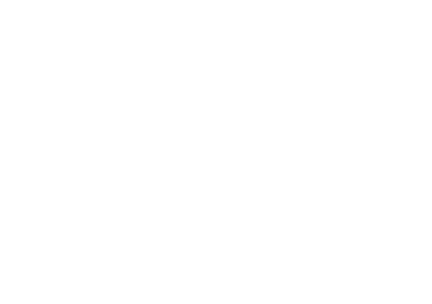

In [43]:
my $view = (@knight-jumps.head ~~ / 'viewBox="' .*? '"' /).Str;
my $defs = @knight-jumps2.join("\n");
my $values = ('#graph' X~ (1..@knight-jumps.elems) X~ ';').join;

Q:s:to/END/;
<svg width="433pt" height="306pt" $view xmlns="http://www.w3.org/2000/svg">
  <defs>
    $defs
  </defs>

  <use href="#graph0" id="animatedImage">
    <animate attributeName="href" values="$values" dur="5s" repeatCount="1" fill="freeze"/>
  </use>
</svg>
END

**Remark:** The animation workflow is fairly universal and it is a good idea to make it into a standalone function that takes a list of SVG images and makes an animation with them.

------

## References

### Articles

[Wk1] Wikipedia entry, ["Knight's tour"](https://en.wikipedia.org/wiki/Knight%27s_tour).

[Wk2] Wikipedia entry, ["Hamiltonian path problem"](https://en.wikipedia.org/wiki/Hamiltonian_path_problem).

### Packages, paclets

[AAp1] Anton Antonvov,
[Graph Raku package](https://github.com/antononcube/Raku-Graph),
(2024),
[GitHub/antononcube](https://github.com/antononcube).

[AAp2] Anton Antonvov,
[Graph Raku package](https://github.com/antononcube/Raku-Graphviz-DOT-Chessboard),
(2024),
[GitHub/antononcube](https://github.com/antononcube).

[AAp3] Anton Antonvov,
[JavaScript::D3 Raku package](https://github.com/antononcube/Raku-JavaScript-D3),
(2022-2024),
[GitHub/antononcube](https://github.com/antononcube).

### Videos

[AAv1] Anton Antonov,
[Graph neat examples in Raku (Set 1)](https://youtu.be/5qXgqqRZHow),
(2024),
[YouTube/@AAA4prediction](https://www.youtube.com/@AAA4prediction).

[AAv2] Anton Antonov,
[Graph neat examples in Raku (Set 2)](https://youtu.be/E7qhutQcWCY),
(2024),
[YouTube/@AAA4prediction](https://www.youtube.com/@AAA4prediction).

[AAv3] Anton Antonov,
[Graph neat examples in Raku (Set 3)](),
(2024),
[YouTube/@AAA4prediction](https://www.youtube.com/@AAA4prediction).
